### Importing the Noon Dataset for Sentiment Analysis

In [3]:
import pandas as pd
commentList_df = pd.read_csv("./Final_Noon_Datasets.csv", header=0)
commentList_df.head()

,post_id,post_title,comment_id,author,comment_text,score,created_utc,is_submitter,contains_noon_mention,type,subreddit
0,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mjkdv,99DragonMaster,will reach border by noon,2,2025-01-28 16:33:14,True,True,comment,DubaiPetrolHeads
1,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mgv03,AgileBadger5988,Be careful of blowing dust during late morning...,9,2025-01-28 16:12:52,False,True,comment,DubaiPetrolHeads
2,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mfqls,jamesdongdong,"Apart from boring things, you can managed. How...",1,2025-01-28 16:03:56,False,True,comment,DubaiPetrolHeads
3,1i9vydl,Warranty from Noon or Amazon,m9lj27y,Agitated-Fox2818,You are looking at a tag in noon app saying 1 ...,2,2025-01-28 10:38:59,False,True,comment,NaN
4,1i9vydl,Warranty from Noon or Amazon,m9lhuq1,m2bop,Are you sure? There's nothing indicating that ...,1,2025-01-28 10:28:09,True,True,comment,NaN


In [4]:
commentList_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   post_id                3598 non-null   object
 1   post_title             3598 non-null   object
 2   comment_id             3598 non-null   object
 3   author                 3360 non-null   object
 4   comment_text           3598 non-null   object
 5   score                  3598 non-null   int64 
 6   created_utc            3598 non-null   object
 7   is_submitter           3598 non-null   bool  
 8   contains_noon_mention  3598 non-null   bool  
 9   type                   3598 non-null   object
 10  subreddit              3079 non-null   object
dtypes: bool(2), int64(1), object(8)
memory usage: 260.1+ KB


### Different ways to perform Sentimemt Analysis

1. Lexicon/rule based approach
<br>It analyze the sentiment based on predefined dictionaries of words and associated scores. TextBlob, VADER, MPQA, LIWC are the some ways of this approach </br>
2. Machine Learning based appraoch
<br>The ML models learn patterns from the sentence and associated sentiment, then predicts the sentiment for new text. The classification models like logistic regression, SVM, Random Forest, XGBoost or others can be used in this case</br>
3. Deep Learning based approach
<br> RNNs, LSTMs, Transformers(BERT, RoBERTAa, DistilBERT and others) and other sequential models can be used to capture the complex patterns of sequence in the text data. Transformers perform state of the art performance in this case</br>


Here we will explore in depth TextBlob, VADER and RoBERTa.

### Using TextBlob (sentiment lexicon):

In [ ]:
#!pip install vaderSentiment
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to perform sentiment analysis using VADER
def analyze_sentiment(comment):
    # Get the sentiment scores for the comment
    sentiment_scores = analyzer.polarity_scores(comment)
    
    # Determine the sentiment label based on the compound score
    if sentiment_scores['compound'] >= 0.05:
        sentiment = 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    # Return both the sentiment label and the compound polarity score
    return sentiment, sentiment_scores['compound']

labelled_commentList_df = commentList_df.copy()
# Apply sentiment analysis to the 'textDisplay' column and create new columns for sentiment and polarity score
labelled_commentList_df[['vader_label', 'vader_polarity']] = labelled_commentList_df['comment_text'].apply(lambda text: pd.Series(analyze_sentiment(text)))

labelled_commentList_df.head()

,post_id,post_title,comment_id,author,comment_text,score,created_utc,is_submitter,contains_noon_mention,type,subreddit,vader_label,vader_polarity
0,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mjkdv,99DragonMaster,will reach border by noon,2,2025-01-28 16:33:14,True,True,comment,DubaiPetrolHeads,Neutral,0.0258
1,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mgv03,AgileBadger5988,Be careful of blowing dust during late morning...,9,2025-01-28 16:12:52,False,True,comment,DubaiPetrolHeads,Negative,-0.5574
2,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mfqls,jamesdongdong,"Apart from boring things, you can managed. How...",1,2025-01-28 16:03:56,False,True,comment,DubaiPetrolHeads,Positive,0.0622
3,1i9vydl,Warranty from Noon or Amazon,m9lj27y,Agitated-Fox2818,You are looking at a tag in noon app saying 1 ...,2,2025-01-28 10:38:59,False,True,comment,NaN,Positive,0.1027
4,1i9vydl,Warranty from Noon or Amazon,m9lhuq1,m2bop,Are you sure? There's nothing indicating that ...,1,2025-01-28 10:28:09,True,True,comment,NaN,Positive,0.3182


### Use Roberta-base-go-emotions(Pre-trained-model)
The details of the pre-trained Roberta-base-go-emotions model can be viewed here: <a href="https://huggingface.co/SamLowe/roberta-base-go_emotions">Roberta Pre-Trained Model </a>

In [ ]:
#!pip uninstall -y torch typing-extensions
#!pip install typing-extensions==4.7.1 torch==2.0.1
import torch
from transformers import pipeline

# Check if CUDA is available
device = 0 if torch.cuda.is_available() else -1
print(f"Using device: {'CUDA' if device == 0 else 'CPU'}")

# Test the classifier
classifier = pipeline(
    task="text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=None,
    device=device
)

Using device: CPU


In [21]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")
from transformers import pipeline

# Removed emotions:
# "caring"

emotions = {
    "positive": ["desire","approval", "admiration", "gratitude", "optimism", "love", "relief", "joy", "pride", "excitement", "amusement", "curiosity"],
    "negative": ["disapproval", "disappointment", "annoyance", "sadness", "anger", "disgust", "embarrassment", "remorse", "grief", "fear", "nervousness"],
    "neutral": ["realization", "surprise", "neutral", "confusion"]
}

classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)
# List to store the sentiment analysis results
sentiment_results = []
comments = labelled_commentList_df['comment_text']
threshold = 0.1
truncate_count = 0;
max_seq_length = 512

# Define a function to truncate the input sequence
def truncate_sequence(sequence, max_length):
    global truncate_count
    if len(sequence) > max_length:
        truncate_count = truncate_count +1;
        return sequence[:max_length]
    else:
        return sequence

def get_score(emotion_label, emotion_array):
    for emotion_obj in emotion_array:
        if emotion_obj['label'] == emotion_label:
            return emotion_obj['score']
    return 0


# Iterate over the comments and analyze sentiment
for comment in comments:
    truncated_comment = truncate_sequence(comment, max_seq_length)
    # Analyze sentiment for the truncated comment
    emotion_scores = classifier(truncated_comment)
    positive_score = sum(emotion['score'] for emotion in emotion_scores[0] if emotion['label'] in emotions["positive"])
    negative_score = sum(emotion['score'] for emotion in emotion_scores[0] if emotion['label'] in emotions["negative"])
    neutral_score = sum(emotion['score'] for emotion in emotion_scores[0] if emotion['label'] in emotions["neutral"])
    overall_polarity = "Neutral"
    if positive_score - negative_score > threshold:
        overall_polarity = "Positive"
    elif negative_score - positive_score > threshold:
        overall_polarity = "Negative"
    sentiment_results.append({
        'comment': comment,
    'roberta_emotion_scores': emotion_scores[0],
    'roberta_positive_score': positive_score,
    'roberta_negative_score': negative_score,
    'roberta_neutral_score': neutral_score,
    'roberta_label': overall_polarity})

sentiment_df = pd.DataFrame(sentiment_results)

# Drop the 'comment' column from sentiment_df
sentiment_df.drop(columns=['comment'], inplace=True)

# Merge the sentiment results DataFrame with the labelled_commentList_df DataFrame
labelled_commentList_df = pd.concat([labelled_commentList_df, sentiment_df], axis=1)
labelled_commentList_df.head()

,post_id,post_title,comment_id,author,comment_text,score,created_utc,is_submitter,contains_noon_mention,type,subreddit,textBlob_polarity,textBlob_label,preprocessed_text,roberta_emotion_scores,roberta_positive_score,roberta_negative_score,roberta_neutral_score,roberta_label
0,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mjkdv,99DragonMaster,will reach border by noon,2,2025-01-28 16:33:14,True,True,comment,DubaiPetrolHeads,0.000000,neutral,reach border noon,"[{'label': 'neutral', 'score': 0.9491845369338...",0.064729,0.014750,0.961027,Neutral
1,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mgv03,AgileBadger5988,Be careful of blowing dust during late morning...,9,2025-01-28 16:12:52,False,True,comment,DubaiPetrolHeads,-0.042857,negative,care blow dust late morn noon sand heat rout a...,"[{'label': 'caring', 'score': 0.81811195611953...",0.155917,0.157256,0.128665,Neutral
2,1ibzgq5,Dubai to Riyadh - Which Road to Take? 1 or 2?,m9mfqls,jamesdongdong,"Apart from boring things, you can managed. How...",1,2025-01-28 16:03:56,False,True,comment,DubaiPetrolHeads,-0.233333,negative,apart bore thing manag howev light pole road b...,"[{'label': 'neutral', 'score': 0.5306403636932...",0.549081,0.029948,0.568553,Positive
3,1i9vydl,Warranty from Noon or Amazon,m9lj27y,Agitated-Fox2818,You are looking at a tag in noon app saying 1 ...,2,2025-01-28 10:38:59,False,True,comment,NaN,0.500000,positive,look tag noon app say year warranti say noon g...,"[{'label': 'neutral', 'score': 0.8981201052665...",0.125795,0.025358,0.923674,Positive
4,1i9vydl,Warranty from Noon or Amazon,m9lhuq1,m2bop,Are you sure? There's nothing indicating that ...,1,2025-01-28 10:28:09,True,True,comment,NaN,0.500000,positive,sure there noth indic read noon warranti polic...,"[{'label': 'neutral', 'score': 0.5903054475784...",0.157819,0.192896,0.946390,Neutral


### Using TextBlob (sentiment lexicon):

In [ ]:
# !pip install textblob
from textblob import TextBlob

def get_comment_polarity(comment):
    comment_text = str(comment) 
    analysis = TextBlob(comment_text)
    polarity = analysis.sentiment.polarity
    return polarity

def get_polarity_label(polarity):
    label = ''
    if polarity == 0:
        label = 'neutral'
    elif polarity < 0.00:
        label = 'negative'
    elif polarity > 0.00:
        label = 'positive'
    return label
            
labelled_commentList_df = commentList_df.copy()


# First, calculate polarity scores
labelled_commentList_df['textBlob_polarity'] = labelled_commentList_df['comment_text'].apply(get_comment_polarity)

# Then, use these polarity scores to get labels
labelled_commentList_df['textBlob_label'] = labelled_commentList_df['textBlob_polarity'].apply(get_polarity_label)

# Display the DataFrame with the added textBlob columns
print(labelled_commentList_df[['comment_text', 'textBlob_polarity', 'textBlob_label']].head(20))

# Show distribution of sentiments
print("\nDistribution of sentiments:")
print(labelled_commentList_df['textBlob_label'].value_counts())

                                         comment_text  textBlob_polarity   
0                           will reach border by noon           0.000000  \
1   Be careful of blowing dust during late morning...          -0.042857   
2   Apart from boring things, you can managed. How...          -0.233333   
3   You are looking at a tag in noon app saying 1 ...           0.500000   
4   Are you sure? There's nothing indicating that ...           0.500000   
5   Warranty is given by OnePlus. Not Noon or Amaz...           0.000000   
6   I am aware of this, but Noon still offers a 12...           0.240000   
7   If you order from Noon, there is a chance you ...           0.300000   
8   It’s not Arabic it’s transliterated English: w...           0.000000   
9   Plot twist - noon did those mistakes on purpos...           0.000000   
10  This perfume shop guy told me it is 250 aed . ...          -0.250000   
11                          So noon must be og right?           0.285714   
12  The one 

### Save the sentiment analysed data to csv

In [ ]:
labelled_commentList_df.to_csv('sentiment_analyzed_data.csv', index=False)
print("Data saved successfully to sentiment_analyzed_data.csv")

Data saved successfully to sentiment_analyzed_data.csv


### Import the sentiment analysed data

In [ ]:
import pandas as pd
labelled_commentList_df = pd.read_csv("./sentiment_analyzed_data.csv", header=0)

### Split the dataset:

Splitting the entire dataset into 80% as training and evaluation dataset, and the rest 20% as test dataset for training and testing purpose of the classification model.

In [8]:
from sklearn.model_selection import train_test_split

X = labelled_commentList_df['comment_text'] 
y = labelled_commentList_df['textBlob_label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))


2878
720


In [22]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]  

False

### Preprocessing the text

1. Case folding
2. Remove Non-Alphabetic Characters
3. Tokenization
4. Stop Word Removal
5. Stemming

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
   text = text.lower()
   text = re.sub(r'[^a-zA-Z\s]', '', text)
   tokens = word_tokenize(text)
   stop_words = set(stopwords.words('english'))
   tokens = [token for token in tokens if token not in stop_words]
   stemmer = PorterStemmer()
   tokens = [stemmer.stem(token) for token in tokens]
   return ' '.join(tokens)

labelled_commentList_df['preprocessed_text'] = labelled_commentList_df['comment_text'].apply(preprocess_text)

print("Original vs Preprocessed text:")
print(labelled_commentList_df[['comment_text', 'preprocessed_text']].head())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pratibha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original vs Preprocessed text:
                                        comment_text   
0                          will reach border by noon  \
1  Be careful of blowing dust during late morning...   
2  Apart from boring things, you can managed. How...   
3  You are looking at a tag in noon app saying 1 ...   
4  Are you sure? There's nothing indicating that ...   

                                   preprocessed_text  
0                                  reach border noon  
1  care blow dust late morn noon sand heat rout a...  
2  apart bore thing manag howev light pole road b...  
3  look tag noon app say year warranti say noon g...  
4  sure there noth indic read noon warranti polic...  


### Vector space representation:

In this block, various method used for vector space representation to mathematically represent the comments are as below:
<br>1.<b>Binary vector </b>
<br>2.<b>Term Frequency - TF </b>
<br>3.<b>Term Frequency-Inverse Document Frequency (TF-IDF) unigram </b>
<br>4.<b>Term Frequency-Inverse Document Frequency (TF-IDF) bigram</b>


The vector representation of comments in each of the above-mentioned methods has been stored as different CSV files and can be viewed from the below link:
To be Updated

### Vector Space Representation - Binary Vector 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for binary representation
binary_vectorizer = CountVectorizer(binary=True, token_pattern=r'\b[a-zA-Z]+\b')

# Fit and transform using the preprocessed_text column
X_binary = binary_vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

# Get feature names
feature_names = binary_vectorizer.get_feature_names_out()

# Create DataFrame with binary vectors
binary_df = pd.DataFrame(X_binary.toarray(), columns=feature_names)

# Save to CSV
binary_df.to_csv('vector_binary.csv', index=False, encoding='utf-8')

# Print shape and first few rows
print("Shape of binary vector representation:", binary_df.shape)
print("\nFirst few rows and columns of binary representation:")
print(binary_df.iloc[:5, :10])  # Show first 5 rows and 10 columns

Shape of binary vector representation: (3598, 5792)

First few rows and columns of binary representation:
   a  aa  aaaand  aah  abaar  abbar  abid  abil  abl  abomin
0  0   0       0    0      0      0     0     0    0       0
1  0   0       0    0      0      0     0     0    0       0
2  0   0       0    0      0      0     0     0    0       0
3  0   0       0    0      0      0     0     0    0       0
4  0   0       0    0      0      0     0     0    0       0


### Vector Space Representation - Frequency Count

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b')

# Fit and transform using the preprocessed_text column
X = vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to display the frequency counts
count_df = pd.DataFrame(X.toarray(), columns=feature_names)

# Save the file
count_df.to_csv('frequency_count.csv', index=False, encoding='utf-8')

# Print the DataFrame
print(count_df)

      a  aa  aaaand  aah  abaar  abbar  abid  abil  abl  abomin  ...  zero  \
0     0   0       0    0      0      0     0     0    0       0  ...     0   
1     0   0       0    0      0      0     0     0    0       0  ...     0   
2     0   0       0    0      0      0     0     0    0       0  ...     0   
3     0   0       0    0      0      0     0     0    0       0  ...     0   
4     0   0       0    0      0      0     0     0    0       0  ...     0   
...  ..  ..     ...  ...    ...    ...   ...   ...  ...     ...  ...   ...   
3593  0   0       0    0      0      0     0     0    0       0  ...     0   
3594  0   0       0    0      0      0     0     0    0       0  ...     0   
3595  0   0       0    0      0      0     0     0    0       0  ...     0   
3596  0   0       0    0      0      0     0     0    0       0  ...     0   
3597  0   0       0    0      0      0     0     0    0       0  ...     0   

      zeroohm  zillion  zip  ziplin  zomato  zomatotalabatcaree

### Vector Space Representation - TF-IDF(Unigram)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b')

# Fit and transform using the preprocessed_text column
X_tfidf = vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

# Get the feature names (words)
feature_names_tfidf = vectorizer.get_feature_names_out()

# Create a DataFrame to display the TF-IDF values
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names_tfidf)

# Save the file
tfidf_df.to_csv('tfidf.csv', index=False, encoding='utf-8')

# Print the DataFrame
print(tfidf_df)

        a   aa  aaaand  aah  abaar  abbar  abid  abil  abl  abomin  ...  zero  \
0     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
1     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
2     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
4     0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
...   ...  ...     ...  ...    ...    ...   ...   ...  ...     ...  ...   ...   
3593  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3594  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3595  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3596  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   
3597  0.0  0.0     0.0  0.0    0.0    0.0   0.0   0.0  0.0     0.0  ...   0.0   

      zeroohm  zillion  zip

### Vector Space Representation TF-IDF(Bigram)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer for bigram features
vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b', ngram_range=(2, 2))

# Fit and transform using the preprocessed_text column
X_tfidf = vectorizer.fit_transform(labelled_commentList_df['preprocessed_text'])

# Get the feature names (bigrams)
feature_names_tfidf = vectorizer.get_feature_names_out()

# Create a DataFrame to display the TF-IDF values
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names_tfidf)

# Save the file
tfidf_df.to_csv('tfidf_bigram.csv', index=False, encoding='utf-8')

# Print the DataFrame
print(tfidf_df)

      a a  a addit  a almost  a also  a alway  a amazon  \
0     0.0      0.0       0.0     0.0      0.0       0.0   
1     0.0      0.0       0.0     0.0      0.0       0.0   
2     0.0      0.0       0.0     0.0      0.0       0.0   
3     0.0      0.0       0.0     0.0      0.0       0.0   
4     0.0      0.0       0.0     0.0      0.0       0.0   
...   ...      ...       ...     ...      ...       ...   
3593  0.0      0.0       0.0     0.0      0.0       0.0   
3594  0.0      0.0       0.0     0.0      0.0       0.0   
3595  0.0      0.0       0.0     0.0      0.0       0.0   
3596  0.0      0.0       0.0     0.0      0.0       0.0   
3597  0.0      0.0       0.0     0.0      0.0       0.0   

      a amazonaehttpsamazona  a amazoncom  a amazonnoon  a anoth  ...  \
0                        0.0          0.0           0.0      0.0  ...   
1                        0.0          0.0           0.0      0.0  ...   
2                        0.0          0.0           0.0      0.0  ...   

### Pipeline:

To build a Text analytic pipeline, the pre-processed comments are comments are represented by 3 different vector representation methods, which are as below:
<br><b>1.	Using both countVectorizer and tfidfVectorizer</b>
<br><b>2.	Using only countVectorizer</b>
<br><b>3.	Using only tfidfVectorizer</b>

These vector space represented text are then passed through 3 different classifiers to compare and analyse the models. The classifiers are as below:
<br><b>1.	Naïve bayes</b>
<br><b>2.	Support Vector Machine (SVM)</b>
<br><b>3.	Logistic Regression</b>

### 1. Using both countVectorizer and tfidf:

In the pipeline using both countVectorizer and tfidfVectorizer, different parameters were varied like binary and max_df for countVectorizer, ngram_range and max_df for tfidfVectorizer. The max_df for both vectorizers were 0.20, 0.50, and 1.0. On tuning the hyperparameters, GridSerachCV is performed to find the best parameters and score from these combinations for each of the classifiers are displayed. Classification report and confusion matrix are also displayed for the best models.

In [14]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define parameters for CountVectorizer
count_vectorizer_params = {
    'binary': [True, False],
    'max_df': [0.20, 0.50, 1.0]
}

# Define parameters for TfidfVectorizer
tfidf_vectorizer_params = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  # Unigram, bigram, trigram
    'max_df': [0.20, 0.50, 1.0]
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Define features using FeatureUnion
features = FeatureUnion([
    ('frequency_count', CountVectorizer()),
    ('tfidf_vectorizer', TfidfVectorizer())
])

# Define hyperparameters grid
param_grid = {
    'features__frequency_count__binary': count_vectorizer_params['binary'],
    'features__frequency_count__max_df': count_vectorizer_params['max_df'],
    'features__tfidf_vectorizer__ngram_range': tfidf_vectorizer_params['ngram_range'],
    'features__tfidf_vectorizer__max_df': tfidf_vectorizer_params['max_df']
}

# Use preprocessed text and Text Blob labels
X = labelled_commentList_df['preprocessed_text']
y = labelled_commentList_df['textBlob_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nClassifier: {classifier_name}")
    print("Executing the pipeline....")
    
    # Create pipeline
    pipeline = Pipeline([
        ('features', features),
        ('clf', classifier)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Get predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 80)


Classifier: Logistic Regression
Executing the pipeline....
Best parameters: {'features__frequency_count__binary': True, 'features__frequency_count__max_df': 0.2, 'features__tfidf_vectorizer__max_df': 1.0, 'features__tfidf_vectorizer__ngram_range': (1, 3)}
Best score: 0.7536467391304348

Classification Report:
              precision    recall  f1-score   support

    negative       0.61      0.54      0.57       154
     neutral       0.73      0.82      0.78       200
    positive       0.81      0.80      0.80       366

    accuracy                           0.75       720
   macro avg       0.72      0.72      0.72       720
weighted avg       0.75      0.75      0.75       720


Confusion Matrix:
[[ 83  23  48]
 [ 14 165  21]
 [ 38  37 291]]
--------------------------------------------------------------------------------

Classifier: SVM
Executing the pipeline....
Best parameters: {'features__frequency_count__binary': True, 'features__frequency_count__max_df': 0.5, 'features__tfi

### 1.1 Using both countVectorizer and tfidf(Roberta):

In the pipeline using both countVectorizer and tfidfVectorizer, different parameters were varied like binary and max_df for countVectorizer, ngram_range and max_df for tfidfVectorizer. The max_df for both vectorizers were 0.20, 0.50, and 1.0. On tuning the hyperparameters, GridSerachCV is performed to find the best parameters and score from these combinations for each of the classifiers are displayed. Classification report and confusion matrix are also displayed for the best models.

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define parameters for CountVectorizer
count_vectorizer_params = {
    'binary': [True, False],
    'max_df': [0.20, 0.50, 1.0]
}

# Define parameters for TfidfVectorizer
tfidf_vectorizer_params = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  # Unigram, bigram, trigram
    'max_df': [0.20, 0.50, 1.0]
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

# Define features using FeatureUnion
features = FeatureUnion([
    ('frequency_count', CountVectorizer()),
    ('tfidf_vectorizer', TfidfVectorizer())
])

# Define hyperparameters grid
param_grid = {
    'features__frequency_count__binary': count_vectorizer_params['binary'],
    'features__frequency_count__max_df': count_vectorizer_params['max_df'],
    'features__tfidf_vectorizer__ngram_range': tfidf_vectorizer_params['ngram_range'],
    'features__tfidf_vectorizer__max_df': tfidf_vectorizer_params['max_df']
}

# Use preprocessed text and Roberta labels
X = labelled_commentList_df['preprocessed_text']
y = labelled_commentList_df['roberta_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nClassifier: {classifier_name}")
    print("Executing the pipeline....")
    
    # Create pipeline
    pipeline = Pipeline([
        ('features', features),
        ('clf', classifier)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Get predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 80)


Classifier: Logistic Regression
Executing the pipeline....
Best parameters: {'features__frequency_count__binary': True, 'features__frequency_count__max_df': 0.2, 'features__tfidf_vectorizer__max_df': 0.5, 'features__tfidf_vectorizer__ngram_range': (1, 1)}
Best score: 0.5920923913043479

Classification Report:
              precision    recall  f1-score   support

    Negative       0.56      0.48      0.52       193
     Neutral       0.47      0.49      0.48       192
    Positive       0.64      0.68      0.66       335

    accuracy                           0.58       720
   macro avg       0.56      0.55      0.55       720
weighted avg       0.57      0.58      0.57       720


Confusion Matrix:
[[ 92  38  63]
 [ 31  94  67]
 [ 40  66 229]]
--------------------------------------------------------------------------------

Classifier: SVM
Executing the pipeline....
Best parameters: {'features__frequency_count__binary': True, 'features__frequency_count__max_df': 1.0, 'features__tfi

### 2. Using only countVectorizer:

In this pipeline, only countVectorizer method is used and the max_df were 0.2, 0.5 and 1. The same steps from the 1st pipeline was followed to obtain the best models for the 3 classifiers.

In [17]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define parameters for CountVectorizer
count_vectorizer_params = {
    'binary': [True, False],
    'max_df': [0.20, 0.50, 1.0]
}


# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}


# Define hyperparameters grid
param_grid = {
    'frequency_count__binary': count_vectorizer_params['binary'],
    'frequency_count__max_df': count_vectorizer_params['max_df'],
    }

# Use preprocessed text and Text Blob labels
X = labelled_commentList_df['preprocessed_text']
y = labelled_commentList_df['textBlob_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nClassifier: {classifier_name}")
    print("Executing the pipeline....")
    
    # Create pipeline
    pipeline = Pipeline([
        ('frequency_count', CountVectorizer()),
        ('clf', classifier)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Get predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 80)


Classifier: Logistic Regression
Executing the pipeline....
Best parameters: {'frequency_count__binary': True, 'frequency_count__max_df': 0.5}
Best score: 0.7494788647342995

Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.56      0.59       154
     neutral       0.75      0.84      0.79       200
    positive       0.82      0.80      0.81       366

    accuracy                           0.76       720
   macro avg       0.73      0.73      0.73       720
weighted avg       0.76      0.76      0.76       720


Confusion Matrix:
[[ 87  20  47]
 [ 14 168  18]
 [ 38  36 292]]
--------------------------------------------------------------------------------

Classifier: SVM
Executing the pipeline....
Best parameters: {'frequency_count__binary': True, 'frequency_count__max_df': 0.2}
Best score: 0.6879746376811595

Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.27     

### 3. Using only tfidf:

This pipeline used only tfidfVectorizer and different parameters were varied like ngram_range [ unigram, bigram, and trigram] and max_df [0.2,0.5, 1.0]. Similar to the other pipelines, these hyperparameters were tuned and GridSerachCV was performed to obtain the best model.

In [19]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define parameters for TfidfVectorizer
tfidf_vectorizer_params = {
    'ngram_range': [(1, 1), (1, 2), (1, 3)],  # Unigram, bigram, trigram
    'max_df': [0.20, 0.50, 1.0]
}

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}


# Define hyperparameters grid
param_grid = {
    'tfidf_vectorizer__ngram_range': tfidf_vectorizer_params['ngram_range'],
    'tfidf_vectorizer__max_df': tfidf_vectorizer_params['max_df']
}

# Use preprocessed text and Text Blob labels
X = labelled_commentList_df['preprocessed_text']
y = labelled_commentList_df['textBlob_label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through classifiers
for classifier_name, classifier in classifiers.items():
    print(f"\nClassifier: {classifier_name}")
    print("Executing the pipeline....")
    
    # Create pipeline
    pipeline = Pipeline([
        ('tfidf_vectorizer', TfidfVectorizer()),
        ('clf', classifier)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Get predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 80)


Classifier: Logistic Regression
Executing the pipeline....
Best parameters: {'tfidf_vectorizer__max_df': 0.2, 'tfidf_vectorizer__ngram_range': (1, 1)}
Best score: 0.71681038647343

Classification Report:
              precision    recall  f1-score   support

    negative       0.76      0.38      0.51       154
     neutral       0.74      0.61      0.67       200
    positive       0.69      0.90      0.79       366

    accuracy                           0.71       720
   macro avg       0.73      0.63      0.65       720
weighted avg       0.72      0.71      0.69       720


Confusion Matrix:
[[ 59  17  78]
 [ 10 122  68]
 [  9  26 331]]
--------------------------------------------------------------------------------

Classifier: SVM
Executing the pipeline....
Best parameters: {'tfidf_vectorizer__max_df': 1.0, 'tfidf_vectorizer__ngram_range': (1, 1)}
Best score: 0.6817185990338164

Classification Report:
              precision    recall  f1-score   support

    negative       0.9

### Graph comparison of all three classifiers based on Accuracy and F1 Score: Logistic Regression, SVN and Naive Bayes

Summarizing the results from these pipelines to inspect and compare these models based on their performance.

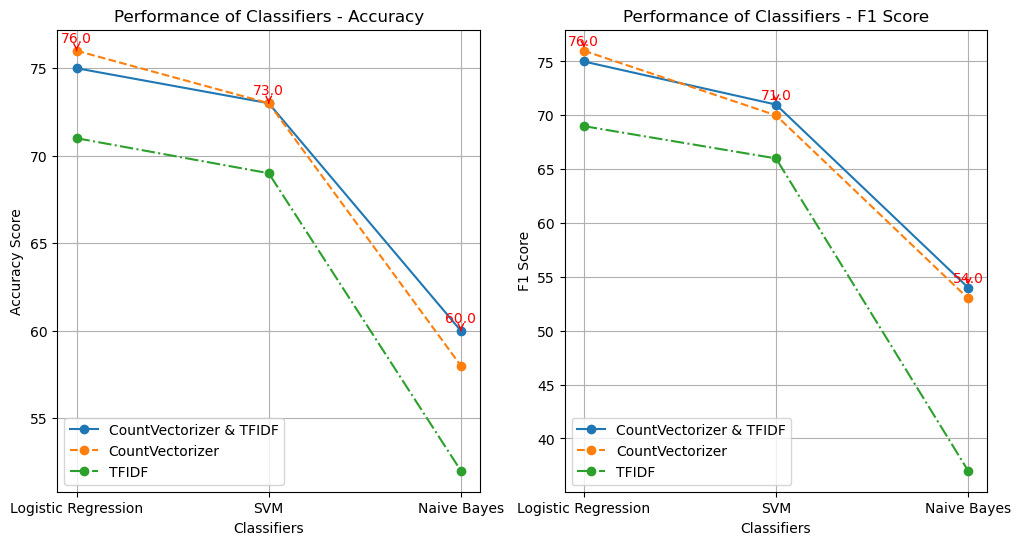

In [21]:
import matplotlib.pyplot as plt

# Define classifier names and corresponding scores
classifier_names = ['Logistic Regression', 'SVM', 'Naive Bayes']
acc_count_tfidf_line = [75, 73, 60]
acc_count_line = [76, 73, 58]
acc_tfidf_line = [71, 69, 52]

f1_count_tfidf_line = [75, 71, 54]
f1_count_line = [76, 70, 53]
f1_tfidf_line = [69, 66, 37]

# Find the top scores for each classifier
acc_top_scores = [max(scores) for scores in zip(acc_count_tfidf_line, acc_count_line, acc_tfidf_line)]
f1_top_scores = [max(scores) for scores in zip(f1_count_tfidf_line, f1_count_line, f1_tfidf_line)]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first graph (Accuracy)
axs[0].plot(classifier_names, acc_count_tfidf_line, label='CountVectorizer & TFIDF', marker='o', linestyle='-')
axs[0].plot(classifier_names, acc_count_line, label='CountVectorizer', marker='o', linestyle='--')
axs[0].plot(classifier_names, acc_tfidf_line, label='TFIDF', marker='o', linestyle='-.')

# Add labels and title for the first graph
axs[0].set_xlabel('Classifiers')
axs[0].set_ylabel('Accuracy Score')
axs[0].set_title('Performance of Classifiers - Accuracy')
axs[0].legend()  # Show legend
axs[0].grid(True)  # Show grid

# Highlight top scores
for classifier, score in zip(classifier_names, acc_top_scores):
    max_index = acc_top_scores.index(score)
    axs[0].annotate(f'{score:.1f}', xy=(classifier_names.index(classifier), score), xytext=(classifier_names.index(classifier), score + 0.5),
                    arrowprops=dict(color='red', arrowstyle='->'), fontsize=10, ha='center', color='red')

# Plot the second graph (F1 Score)
axs[1].plot(classifier_names, f1_count_tfidf_line, label='CountVectorizer & TFIDF', marker='o', linestyle='-')
axs[1].plot(classifier_names, f1_count_line, label='CountVectorizer', marker='o', linestyle='--')
axs[1].plot(classifier_names, f1_tfidf_line, label='TFIDF', marker='o', linestyle='-.')

# Add labels and title for the second graph
axs[1].set_xlabel('Classifiers')
axs[1].set_ylabel('F1 Score')
axs[1].set_title('Performance of Classifiers - F1 Score')
axs[1].legend()  # Show legend
axs[1].grid(True)  # Show grid

# Highlight top scores
for classifier, score in zip(classifier_names, f1_top_scores):
    max_index = f1_top_scores.index(score)
    axs[1].annotate(f'{score:.1f}', xy=(max_index, score), xytext=(max_index, score + 0.5),
                arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, ha='center', color='red')


plt.show()


### Table comparision of all Classifiers(Logistic Regression, SVN and Naive Bayes) based on Accuracy and F1 score

In [26]:
# Create the dataframe for accuracy scores of all 3 classifiers
df_accuracy = pd.DataFrame([
    [75, 76, 71],
    [73, 73, 69],
    [60, 58, 52],
], index=pd.Index(['Logistic Regression', 'SVM', 'Naive Bayes']),
   columns=pd.MultiIndex.from_product([['CountVectorizer & TFIDF', 'CountVectorizer', 'TFIDF']]))
df_accuracy.style

# Create the dataframe for f1 score scores of all 3 classifiers
df_f1 = pd.DataFrame([
    [75, 76, 69],
    [71, 70, 66],
    [54, 53, 37],
], index=pd.Index(['Logistic Regression', 'SVM', 'Naive Bayes']),
   columns=pd.MultiIndex.from_product([['CountVectorizer & TFIDF', 'CountVectorizer', 'TFIDF']]))


s_accuracy = df_accuracy.style
s_f1 = df_f1.style
# Add table styles
cell_hover = {'selector': 'td:hover', 'props': [('background-color', '#ffffb3')]}
index_names = {'selector': '.index_name', 'props': 'font-style: italic; color: darkgrey; font-weight: normal;'}
headers = {'selector': 'th:not(.index_name)', 'props': 'background-color: #000066; color: white; text-align: center'}
s_accuracy.set_table_styles([cell_hover, index_names, headers])
s_accuracy.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row0.col0',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row1.col2',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row2.col2',  'props': 'background-color: green; color: white'}
], overwrite=False)
s_accuracy.set_caption("Comparison of classifiers performance - Accuracy") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: white; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)



,"('CountVectorizer & TFIDF',)","('CountVectorizer',)","('TFIDF',)"
Logistic Regression,75,76,71
SVM,73,73,69
Naive Bayes,60,58,52


In [27]:
s_f1.set_table_styles([cell_hover, index_names, headers])
s_f1.set_table_styles([
        {'selector': '.col_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.row_heading', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': '.data', 'props': 'font-size: 22px; text-align: center; border: none;'},
    {'selector': 'td.row0.col0',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row1.col2',  'props': 'background-color: green; color: white'},
     {'selector': 'td.row2.col2',  'props': 'background-color: green; color: white'}
], overwrite=False)

s_f1.set_caption("Comparison of classifiers performance - F1 Score") \
    .set_table_styles([{
        'selector': 'caption',
        'props': 'caption-side: top; font-size: 20px; color: white; font-weight: bold; text-align: center; margin-bottom: 30px'
    }], overwrite=False)


,"('CountVectorizer & TFIDF',)","('CountVectorizer',)","('TFIDF',)"
Logistic Regression,75,76,69
SVM,71,70,66
Naive Bayes,54,53,37


###  Visualization and Insights:

### Top 20 postive comments(WordCloud)

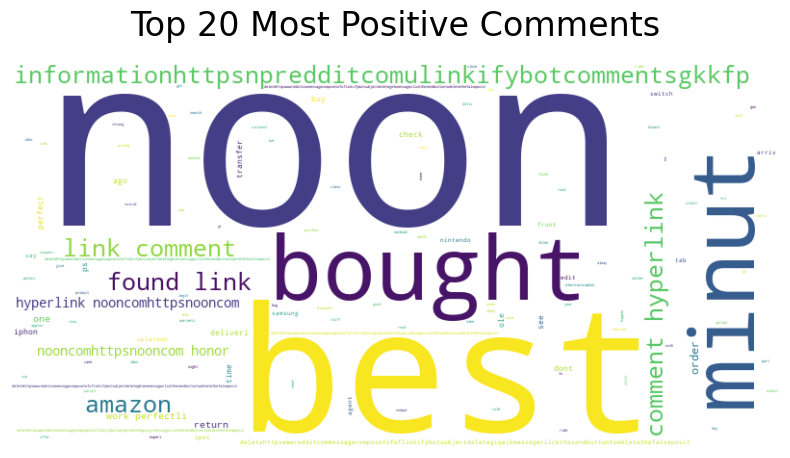


Sample Most Positive Comments (with polarity scores):
                                           comment_text  textBlob_polarity
696   I bought my PS5, Samsung Tab S8+ and Nintendo ...                1.0
1241  It is. Also it says it is returnable so you ca...                1.0
3103  **I found links in your comment that were not ...                1.0


In [18]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter comments where textBlob_label is "positive"
positive_comments = labelled_commentList_df[labelled_commentList_df['textBlob_label'] == 'positive']

# Sort by textBlob_polarity in descending order and select top 20 comments
top_positive = positive_comments.sort_values(by='textBlob_polarity', ascending=False).head(20)

# Concatenate the top 20 positive comments
positive_text = ' '.join(top_positive['preprocessed_text'])

# Generate word cloud for positive comments
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title("Top 20 Most Positive Comments", fontsize=24, color="black", pad=20)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print sample positive comments with their polarity scores
print("\nSample Most Positive Comments (with polarity scores):")
print(top_positive[['comment_text', 'textBlob_polarity']].head(3))

### Top 20 Negative comments(WordCloud)

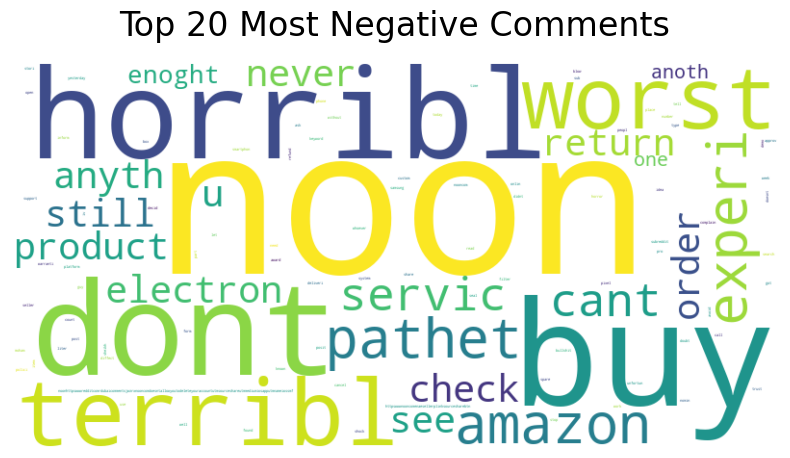


Sample Most Negative Comments (with polarity scores):
                                           comment_text  textBlob_polarity
2973  Another one from [Noon](https://www.reddit.com...               -1.0
967              Noon is terrible. Don't buy from there               -1.0
1614  Tell me about it, stopped buying from noon aft...               -1.0


In [19]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter comments where textBlob_label is "negative"
negative_comments = labelled_commentList_df[labelled_commentList_df['textBlob_label'] == 'negative']

# Sort by textBlob_polarity in ascending order to get most negative first
top_negative = negative_comments.sort_values(by='textBlob_polarity', ascending=True).head(20)

# Concatenate the top 20 negative comments
negative_text = ' '.join(top_negative['preprocessed_text'])

# Generate word cloud for negative comments
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title("Top 20 Most Negative Comments", fontsize=24, color="black", pad=20)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print sample negative comments with their polarity scores
print("\nSample Most Negative Comments (with polarity scores):")
print(top_negative[['comment_text', 'textBlob_polarity']].head(3))

### Top 20 Neutral comments(WordCloud)

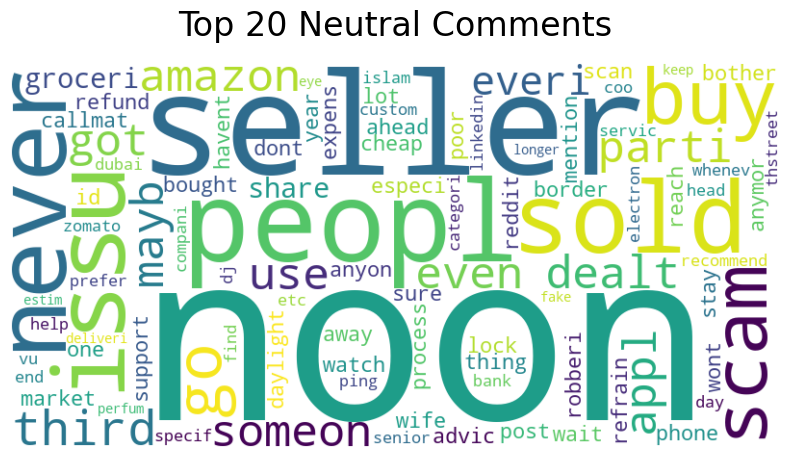


Sample Neutral Comments (with polarity scores):
                                           comment_text  textBlob_polarity
0                             will reach border by noon                0.0
2138  If its sold by noon go ahead. If its sold by t...                0.0
2140  Don't cheap out on an apple watch. Especially ...                0.0


In [20]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter comments where textBlob_label is "neutral"
neutral_comments = labelled_commentList_df[labelled_commentList_df['textBlob_label'] == 'neutral']

# Sort by textBlob_polarity
top_neutral = neutral_comments.sort_values(by='textBlob_polarity', ascending=True).head(20)

# Concatenate the top 20 neutral comments
neutral_text = ' '.join(top_neutral['preprocessed_text'])

# Generate word cloud for neutral comments
wordcloud_neu = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.title("Top 20 Neutral Comments", fontsize=24, color="black", pad=20)
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.show()

# Print sample neutral comments with their polarity scores
print("\nSample Neutral Comments (with polarity scores):")
print(top_neutral[['comment_text', 'textBlob_polarity']].head(3))

### pyLDAvis

In [1]:
#!pip install pyLDAvis
#!pip install pandas==1.5.3
from __future__ import print_function
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import warnings

In [10]:
import pyLDAvis.gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus
from IPython.display import HTML
import warnings

# For all comments
vectorizer = CountVectorizer(stop_words='english', max_features=5000, max_df=0.20)
text_data = labelled_commentList_df['comment_text'].values.astype('U')
dtm = vectorizer.fit_transform(text_data)

# Convert to gensim format
corpus = Sparse2Corpus(dtm, documents_columns=False)
id2word = Dictionary.from_corpus(corpus, id2word=dict((id, word) for word, id in vectorizer.vocabulary_.items()))

# Fit LDA model
lda = LdaModel(corpus=corpus, id2word=id2word, num_topics=5, random_state=0)

# Prepare visualization
pyLDAvis.enable_notebook()
warnings.filterwarnings("ignore", category=DeprecationWarning)

prepared_vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)

# Display title and visualization
display(HTML('<h1 style="font-size:24px;text-align:center;">Topic Modelling For All Comments</h1>'))
pyLDAvis.display(prepared_vis)